<a href="https://colab.research.google.com/github/edielsonpf/particle-swarm-optimization/blob/master/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>


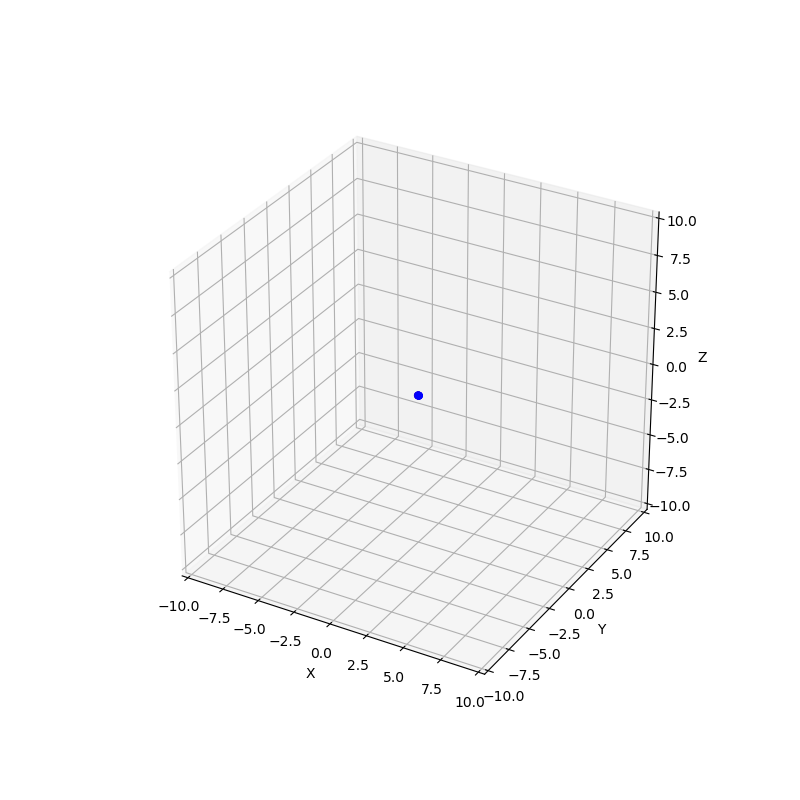

----------FINAL SOLUTION----------
Candidate solution: [-0.01154258396570124, 0.003976493901704378, 0.003286934975335752]
Cost: 0.0001412844590030861


In [9]:
# function we are attempting to optimize (minimize)
def cost_function(x):
    cost=0
    for i in range(0, len(x)):
        cost+=x[i]**2
    return cost

initial_pos=[-5,5,5]               # initial starting location [x1,x2...]
bounds = [(-10.0,10.0),(-10.0,10.0),(-10.0,10.0)]
dimension = len(initial_pos)
max_iteration = 10
num_particles = 20
inertia = 0.01
DRAW = True
SHOW_STEPS = False

if DRAW:
  %matplotlib notebook

  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D  
  import time
    
  fig = plt.figure(figsize=(8,8))
  ax = fig.add_subplot(111,projection='3d')
    
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  ax.set_xlim(bounds[0][0], bounds[0][1])
  ax.set_ylim(bounds[1][0], bounds[1][1])
  ax.set_zlim(bounds[2][0], bounds[2][1])
  
  plt.ion()
  fig.show()
  fig.canvas.draw()

    
pso = PSO(cost_function,dimension,bounds,num_particles, max_iteration, inertia)

iter_idx = 1;
for swarm,pos_best_g,err_best_g in pso:
  
  if SHOW_STEPS:
    print("Iteraction {}".format(iter_idx))
    print ("Candidate solution: {}" .format(pos_best_g))
    print ("Cost: {}".format(err_best_g))

  iter_idx+=1  

  if DRAW:
     
      x = []
      y = []
      z = []
      collor = []

      for particle in swarm:
        x.append(particle.get_position()[0])
        y.append(particle.get_position()[1])
        z.append(particle.get_position()[2])
        if particle.get_position() == pos_best_g:
          collor.append('r')  
        else:
          collor.append('b')          
        
      ax.clear()
      ax.scatter(x,y,z, c = collor)
      ax.set_xlim(bounds[0][0], bounds[0][1])
      ax.set_ylim(bounds[1][0], bounds[1][1])
      ax.set_zlim(bounds[2][0], bounds[2][1])
      ax.set_xlabel('X')
      ax.set_ylabel('Y')
      ax.set_zlabel('Z')
   

      fig.canvas.draw()
      time.sleep(0.5)

print(10*"-" + "FINAL SOLUTION" + 10*"-")
print ("Candidate solution: {}" .format(pos_best_g))
print ("Cost: {}".format(err_best_g))

In [8]:
import random
import math

class Particle:
  
  def __init__(self, dimension, init_pos, bounds):

    self.__dim = dimension                                        #particle dimension
    self.__bounds = bounds                                        #particle initial position
    self.__pos = init_pos                                         #particle initial position
    self.__pos_best = init_pos                                    #particle best position
    self.__vel = [random.uniform(-1,1) for _ in range(dimension)] #particle velocity
    self.__err_best = -1                                          #particle best error
    self.__err = -1                                               #particle current error

  def update_position(self):
    """ 
    Update current position 
    """
    for idx in range(0, self.__dim):
      
      self.__pos[idx] = self.__pos[idx] + self.__vel[idx]
      
      # adjust position if biggger then max bound
      if(self.__pos[idx] > self.__bounds[idx][1]):
        self.__pos[idx] = self.__bounds[idx][1]
      # adjust position if smaller then min bound
      if(self.__pos[idx] < self.__bounds[idx][0]):
        self.__pos[idx] = self.__bounds[idx][0]          
  
    return self.__pos

  def get_position(self):
    """ 
    Returns current position 
    """
    return self.__pos

  def evaluate(self,costFunc):
    """ 
    Evaluate current fitness 
    """
    self.__err = costFunc(self.__pos)

    # check to see if the current position is the individual best
    if self.__err < self.__err_best or self.__err_best==-1:
        self.__pos_best = self.__pos
        self.__err_best = self.__err
    
    return self.__err

  def update_velocity(self, inertia_w, c1, c2, pos_best_g):
      """ 
      Update particle velocity

      inertia_w: constant inertia weight (how much to weigh the previous velocity)
      c1: cognitive constant
      c2: social constant
      """
      for idx in range(0,self.__dim):
          r1=random.random()
          r2=random.random()

          cognitive_vel=c1*r1*(self.__pos_best[idx]-self.__pos[idx])
          social_vel=c2*r2*(pos_best_g[idx]-self.__pos[idx])
          self.__vel[idx]=inertia_w*self.__vel[idx]+cognitive_vel+social_vel
          
class PSO():
  def __init__(self, costFunc, dimension, bounds, num_particles, max_iter, inertia_w):
        
        self.__dimension = dimension
        self.__err_best_g=-1                   # best error for group
        self.__pos_best_g=[]                   # best position for group
        self.__max_iter = max_iter
        self.__costFunc = costFunc
        self.__inertia_w = inertia_w
        self.__c1 = 1
        self.__c2 = 2

        # create the swarm
        self.__swarm=[]
        for _ in range(0,num_particles):
            init_pos = [random.uniform(bounds[idx][0],bounds[idx][1]) for idx in range(0, dimension)]
            self.__swarm.append(Particle(dimension, init_pos, bounds))
            
  def __iter__(self):
    """
    Generator which returns the current swarm status.
    """

    iter_idx = 0
    while iter_idx < self.__max_iter:

      #print("iter {}".format(iter_idx))
      for particle in self.__swarm:
        err_particle = particle.evaluate(self.__costFunc)
        # determine if current particle is the best (globally)
        if err_particle < self.__err_best_g or self.__err_best_g == -1:
            self.__pos_best_g = particle.get_position()
            self.__err_best_g = err_particle

      # run over the swarm and update velocity and position
      for particle in self.__swarm:
        particle.update_velocity(self.__inertia_w, self.__c1, self.__c2, self.__pos_best_g)
        particle.update_position()

      iter_idx+=1
            
      yield self.__swarm, self.__pos_best_g, self.__err_best_g 